In [23]:
from navground import core, sim
import numpy as np

In [24]:
world = sim.World()

# place some agents at random position

for _ in range(3):
    agent = sim.Agent(radius=0.5)
    agent.position = np.random.rand(2) * 4 - 2
    agent.orientation = np.random.rand() * np.pi * 2
    world.add_agent(agent)

world.add_obstacle(core.Disc((3, 3), 0.75))
world.add_obstacle(core.Disc((-3, -3), 0.55))

ps = [(5 * i, 5 * j) for i, j in ((1, -1), (-1, -1), (-1, 1), (1, 1), (1, -1))]
for p1, p2 in zip(ps, ps[1:]):
    world.add_wall(core.LineSegment(p1, p2))

world.space_agents_apart(minimal_distance = 1.0)

agent = world.agents[0]
agent.pose

Pose2((-0.159188, 1.227727), 1.050115)

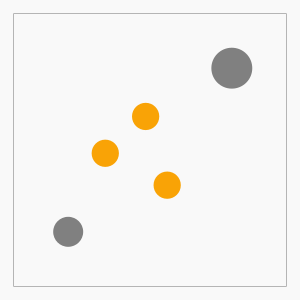

In [25]:
from IPython.display import SVG
from matplotlib import pyplot as plt
from navground.sim.ui import to_svg

SVG(to_svg.svg_for_world(world, width=300))

# Geometric

In [26]:
state = core.GeometricState()

In [27]:
estimation = sim.state_estimations.BoundedStateEstimation(
    range=10, update_static_obstacles=True)

In [28]:
estimation.update(agent, world, state)

In [29]:
state.neighbors

[Neighbor(Disc((0.627661, -1.289393), 0.500000), (0.000000, 0.000000), 0),
 Neighbor(Disc((-1.636555, -0.123343), 0.500000), (0.000000, 0.000000), 0)]

In [30]:
state.static_obstacles

[Disc((-3.000000, -3.000000), 0.550000), Disc((3.000000, 3.000000), 0.750000)]

In [31]:
# not a bug ... does not dynamically update static obstacles
# but I should add a param to specify this
state.line_obstacles

[]

# Sensing

## Lidar

In [32]:
state = core.SensingState()

In [33]:
estimation = sim.state_estimations.LidarStateEstimation(
    range=10, resolution=100)

In [34]:
estimation.update(agent, world, state)

In [35]:
ranges = state.buffers['range'].data
angles = np.linspace(estimation.start_angle, 
                     estimation.start_angle + estimation.field_of_view, 
                     estimation.resolution)

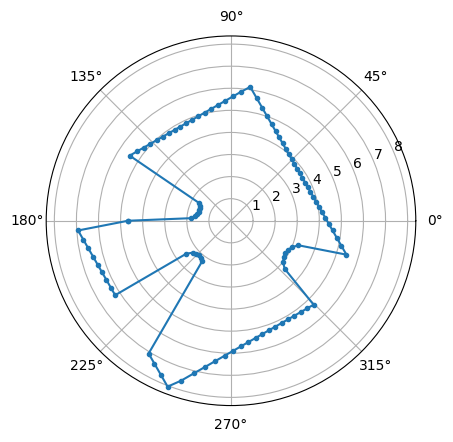

In [36]:
plt.polar(angles, ranges, '.-')

## Discs

In [37]:
state = core.SensingState()

In [38]:
estimation = sim.state_estimations.DiscsStateEstimation(
    range=10, number=2)

In [39]:
estimation.update(agent, world, state)

In [40]:
dict(state.buffers)

{'position': Buffer(description=BufferDescription(shape=(2, 2), type=dtype('float64'), low=0.0, high=10.0, categorical=False), data=array([[-0.92113625,  1.3583202 ],
        [-0.8062806 , -1.18591952]])),
 'radius': Buffer(description=BufferDescription(shape=(2,), type=dtype('float64'), low=0.0, high=1.0, categorical=False), data=array([0.5, 0.5])),
 'velocity': Buffer(description=BufferDescription(shape=(2, 2), type=dtype('float64'), low=0.0, high=1.0, categorical=False), data=array([[0., 0.],
        [0., 0.]]))}

(-10.0, 10.0)

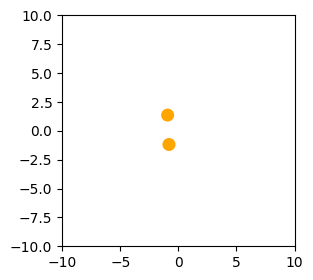

In [41]:
fig, ax = plt.subplots(figsize=(3, 3)) 
# ax.add_patch(plt.Circle((0, 0), agent.radius, color='black'))
for xy, r in zip(state.buffers['position'].data, 
                 state.buffers['radius'].data):
    ax.add_patch(plt.Circle(xy, r, color='orange'))
plt.xlim(-estimation.range, estimation.range)
plt.ylim(-estimation.range, estimation.range)
# plt.axis('off');